# To implement and evaluate a Naïve Bayes classifier using the Iris dataset in Python with scikit-learn.

#### Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


#### Step 2: Load the Dataset

In [52]:
iris = load_iris()

In [53]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head(10))

print("\nTarget names:", iris.target_names)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

In [54]:
X = iris.data
y = iris.target

#### Step 3: Split Dataset (70% Training, 30% Testing)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Step 4: Initialize the Naïve Bayes Classifier

In [56]:
nb = GaussianNB()

#### Step 5: Train the Model

In [57]:
nb.fit(X_train, y_train)

GaussianNB()

#### Step 6: Predict on Test Set

In [58]:
y_pred = nb.predict(X_test)

#### Step 7: Evaluate the Model

In [59]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy Score: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



## Student Practice Tasks
1. Replace GaussianNB with MultinomialNB and observe
performance.


In [17]:
iris = load_iris()
X, y = iris.data, iris.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [20]:
from sklearn.naive_bayes import MultinomialNB  
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = mnb.predict(X_test)

In [22]:
print("Accuracy with MultinomialNB:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy with MultinomialNB: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### 2. Modify test_size value and observe changes.

In [23]:
for size in [0.2, 0.3, 0.4, 0.5]:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=size, random_state=42, stratify=y
    )
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print(f"Test Size = {size}, Accuracy = {accuracy_score(y_test, y_pred):.2f}")

Test Size = 0.2, Accuracy = 0.97
Test Size = 0.3, Accuracy = 0.91
Test Size = 0.4, Accuracy = 0.93
Test Size = 0.5, Accuracy = 0.95


### 3.a. Try this on a different dataset like Wine 

In [24]:
from sklearn.datasets import load_wine, load_breast_cancer

In [29]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

print(df.head(10))

print("\nTarget names:", wine.target_names)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.

In [35]:
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine
)

In [37]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = nb.predict(X_test)

In [39]:
print("Wine Dataset Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))

Wine Dataset Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



### 3.b. Try this on a different dataset like Breast cancer

In [43]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

print(df.head(10))

print("\nTarget names:", cancer.target_names)
X_c, y_c = cancer.data, cancer.target

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.3, random_state=42, stratify=y_c)


In [45]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [46]:
y_pred = nb.predict(X_test)

In [47]:
print("Breast Cancer Dataset Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))

Breast Cancer Dataset Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



### 4. Visualize decision boundaries using only two features.

In [48]:
import matplotlib.pyplot as plt
import numpy as np

X = iris.data[:, [2, 3]] 
y = iris.target

nb = GaussianNB()
nb.fit(X, y)

GaussianNB()

In [49]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [50]:
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

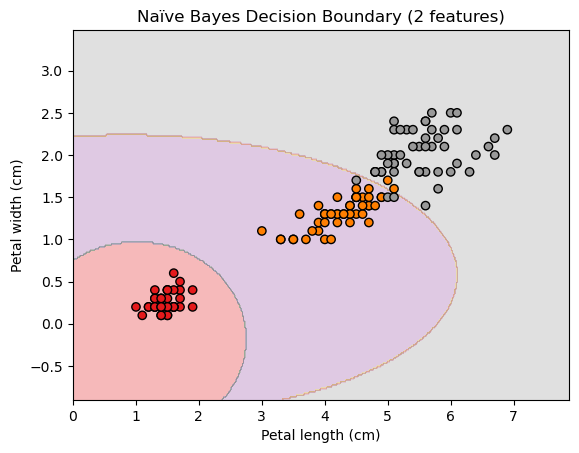

In [51]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Naïve Bayes Decision Boundary (2 features)')
plt.show()